# 🌟 Tiny ARC - Small-Scale Puzzle Solver

This notebook is designed to tackle **small-scale puzzles** from the ARC (Abstraction and Reasoning Corpus) dataset, giving you the chance to test your solution (`solver_v1`) on simpler, less resource-intensive challenges. Starting with small examples helps you build a strong foundation before scaling up to larger and more complex grids (such as the 30x30 puzzles). 🧩

The `get_tiny_arc()` function allows you to **filter challenges by grid dimensions**, selecting puzzles based on their width (`n`) and height (`m`). You can choose between the training or evaluation sets, and focus on grids that fit within a manageable size range for efficient testing.

### 🔑 Key Features:
- **Flexible challenge selection by size**: Work with grids that are easier to handle by filtering based on specific width (`n`) and height (`m`) parameters.
- **Test your solver with ease**: Import and test your solution in a controlled environment using smaller, less computationally demanding puzzles before moving on to more complex challenges.

In [1]:
import random
from abstract_and_reason import solver_v1

In [2]:
anr = solver_v1.Solver()

### Choose between training and evalutation set (commented)

challenges = anr.training_challenges # or anr.evaluation_challenges

def get_tiny_arc(challenges, max_n, max_m):
    """
    Selects challenges from the ARC dataset based on grid size.

    This function filters and returns a list of challenge IDs where the average size of the input and output grids 
    (width and height) is less than or equal to the specified maximum grid dimensions (max_n x max_m).

    Args:
        challenges (dict): A dictionary containing ARC challenges, either from the training or evaluation set.
        max_n (int): The maximum allowed width (n) for a grid.
        max_m (int): The maximum allowed height (m) for a grid.

    Returns:
        list: A list of challenge IDs that meet the size constraints.
    """
    ids = list(challenges)
    ids_sizes = []
    
    for challenge_id in ids:
        input_mean = 0
        output_mean = 0
        nb_example = 0
        
        for challenge in challenges[challenge_id]['train']:
            input_size = sum(len(obj) for obj in challenge['input']) * len(challenge['input'])
            output_size = sum(len(obj) for obj in challenge['output']) * len(challenge['output'])
            
            input_mean += input_size
            output_mean += output_size
            
            nb_example += 1
        
        input_mean /= nb_example
        output_mean /= nb_example
        
        if input_mean <= max_n**2 and output_mean <= max_m**2:
            ids_sizes.append(challenge_id)
    
    return ids_sizes


In [3]:
smol_challenges = get_tiny_arc(challenges, max_n=8, max_m=8)

print(f"Small challenges set contains {len(smol_challenges)} challenges")

Small challenges set contains 26 challenges


## Display a random small challenge

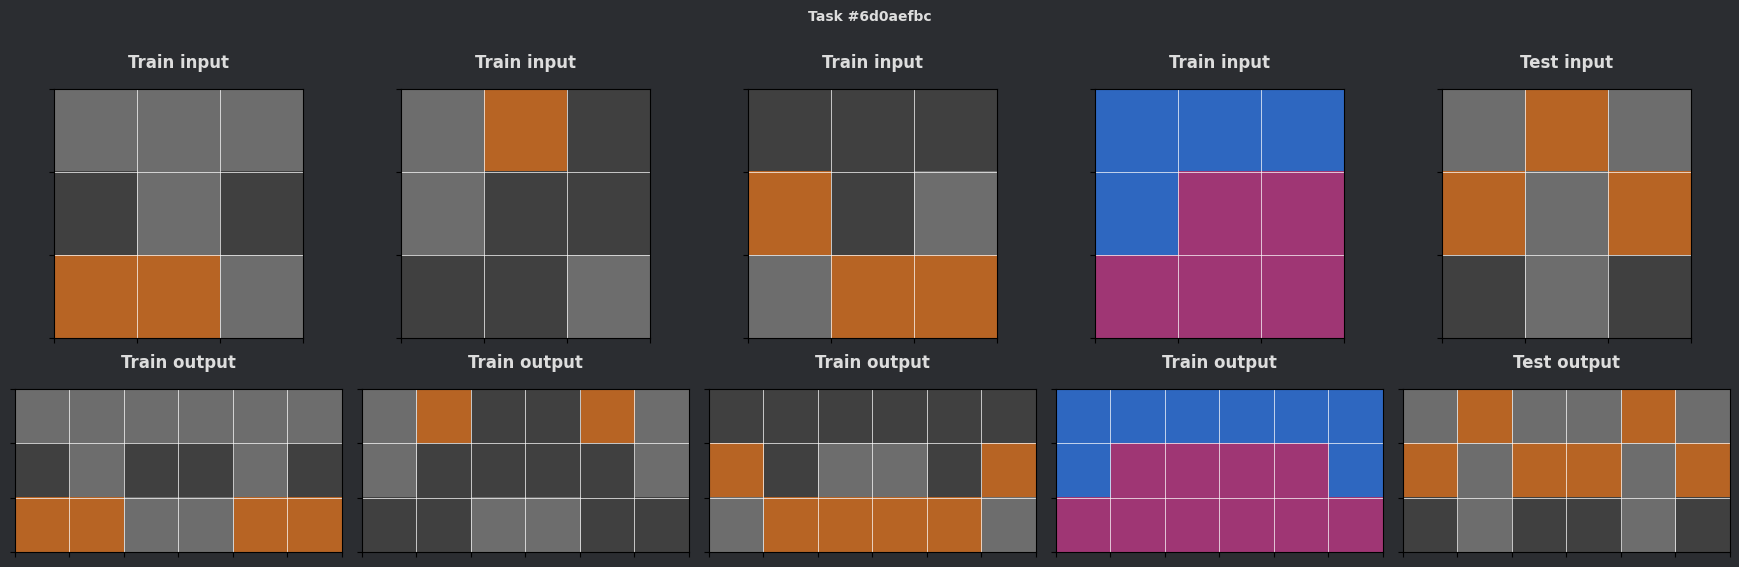

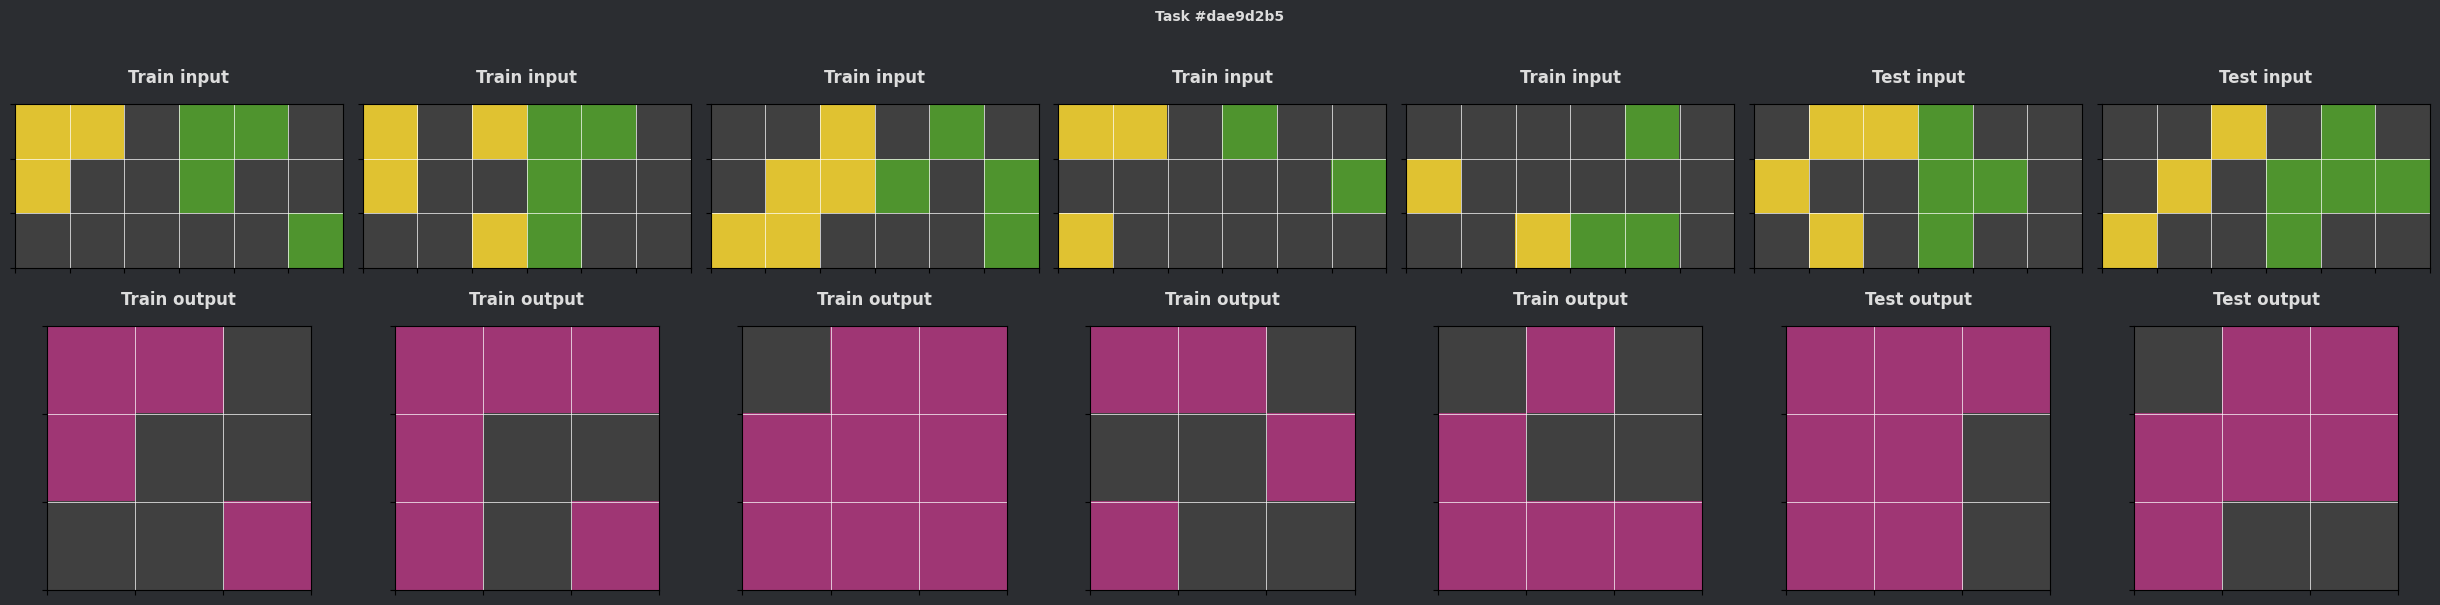

In [4]:
for i in range (0,2):
    random_id = random.choice(smol_challenges)

    puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test = anr.process_challenge(random_id, challenges, solutions)
    anr.display_task(random_id, puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test)
    print("\n\n")

### 💡 Save Yourself the Headache! 💡

I've made the mistakes so you don't have to! Now, you'll save tons of time working on ARC-AGI. 

If this notebook helped you avoid common pitfalls or sped up your progress, I'd love your support!

- **Follow me on Kaggle:** [Malo Le Mestre](https://www.kaggle.com/malolem)
- **Leave a ⭐ on the GitHub repo** [here](https://github.com/MaloLM/arc-agi-genesis) to show your appreciation and keep the project growing!
- **Upvote this notebook** on Kaggle if it saved you from banging your head against the wall!

Your feedback keeps me motivated and helps others avoid the same challenges. 

# Thank you! 🚀✨